In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv(r"C:\Users\bhask\Desktop\DATA SCIENCE AND ANALYTICS\Internship_Inno\DATA_ANALYSIS_EDA\laptop_details.csv")

In [3]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [4]:
df.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [6]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [7]:
df.drop('Rating', axis = 1, inplace = True
       )

In [8]:
df.head()

,Product,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  720 non-null    object
 1   MRP      720 non-null    object
 2   Feature  720 non-null    object
dtypes: object(3)
memory usage: 17.0+ KB


### Data Cleaning and extraction of feature

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  421 non-null    object 
 1   MRP      421 non-null    float64
 2   Feature  421 non-null    object 
dtypes: float64(1), object(2)
memory usage: 13.2+ KB


In [14]:
df["Brand_name"] = df["Product"].apply(lambda x: x.split(" ")[0])
df.head()

,Product,MRP,Feature,Brand_name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [15]:
df['Brand_name'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [16]:
re_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

In [17]:
#RAM_type
def extract_ram_type(text):
    match = re.search(re_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None
df['RAM_Type'] = df['Feature'].apply(extract_ram_type)

In [18]:
#RAM_size
df['RAM_Size'] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('DDR')[0])[-1]))

In [19]:
df.head()

,Product,MRP,Feature,Brand_name,RAM_Type,RAM_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8


In [20]:
#Storage_size
df["Storage_size"] = df['Feature'].apply(lambda x: int(re.findall(r'\d+', x.split('SSD')[0])[-1]))

In [21]:
#Storage_type
df["Storage_type"] = df['Product'].apply(lambda x: "HDD" if 'HDD'in x else "SSD")

In [22]:
#Operating_SYstem_type
df['OS_Type'] = df['Feature'].apply(lambda x: 'Windows' if 'Windows' in x else'Mac OS' if 'Mac OS' in x else 'Others')

In [23]:
df.head()

,Product,MRP,Feature,Brand_name,RAM_Type,RAM_Size,Storage_size,Storage_type,OS_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,256,SSD,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,512,SSD,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,DDR4,8,512,SSD,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows


In [24]:
#Processor_type
reg= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(reg, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type']=df['Processor Type'].apply(lambda x: x.replace(" Processor", ""))

In [25]:
df.head()

,Product,MRP,Feature,Brand_name,RAM_Type,RAM_Size,Storage_size,Storage_type,OS_Type,Processor Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,256,SSD,Windows,Intel Core i3
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,512,SSD,Windows,Intel Core i3
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows,Intel Core i3
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,DDR4,8,512,SSD,Windows,AMD Ryzen 5 Hexa Core
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows,Intel Core i5


In [26]:
#Processor_Brand
def extract_processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"


df['Processor'] = df['Feature'].apply(extract_processor_brand)


In [27]:
df['Processor'].value_counts()

Intel     272
AMD       129
Others     20
Name: Processor, dtype: int64

In [28]:
df.Processor.unique()

array(['Intel', 'AMD', 'Others'], dtype=object)

In [29]:
df.head()

,Product,MRP,Feature,Brand_name,RAM_Type,RAM_Size,Storage_size,Storage_type,OS_Type,Processor Type,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,256,SSD,Windows,Intel Core i3,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,DDR4,8,512,SSD,Windows,Intel Core i3,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows,Intel Core i3,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,DDR4,8,512,SSD,Windows,AMD Ryzen 5 Hexa Core,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,DDR4,8,512,SSD,Windows,Intel Core i5,Intel


### EDA

In [30]:
df_new = df[['Brand_name','Processor','RAM_Size',"RAM_Type",'Storage_size',"Storage_type",'OS_Type',"MRP"]]

In [31]:
df_new.head()

,Brand_name,Processor,RAM_Size,RAM_Type,Storage_size,Storage_type,OS_Type,MRP
0,Lenovo,Intel,8,DDR4,256,SSD,Windows,36990.0
1,Lenovo,Intel,8,DDR4,512,SSD,Windows,39990.0
2,ASUS,Intel,8,DDR4,512,SSD,Windows,32990.0
3,HP,AMD,8,DDR4,512,SSD,Windows,49990.0
4,ASUS,Intel,8,DDR4,512,SSD,Windows,49990.0


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand_name    421 non-null    object 
 1   Processor     421 non-null    object 
 2   RAM_Size      421 non-null    int64  
 3   RAM_Type      409 non-null    object 
 4   Storage_size  421 non-null    int64  
 5   Storage_type  421 non-null    object 
 6   OS_Type       421 non-null    object 
 7   MRP           421 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 29.6+ KB


In [33]:
print("Minimum :", df_new['MRP'].min())
print("Maximum :", df_new['MRP'].max())
print("Mean :", df_new['MRP'].mean())
print("Median :", df_new['MRP'].median())
print("Standard Deviation :", df_new['MRP'].std())

Minimum : 14990.0
Maximum : 434830.0
Mean : 81363.63182897863
Median : 61490.0
Standard Deviation : 62584.16837149968


In [34]:
#Obervation : DEfinitely outliers present  

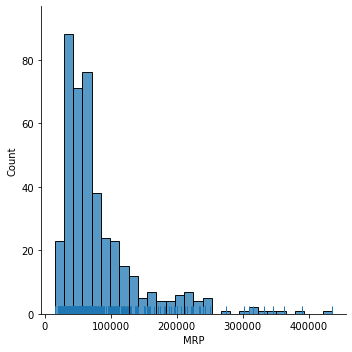

In [35]:
#MRP_analysis
sns.displot(df_new['MRP'], rug= True)

<AxesSubplot:>

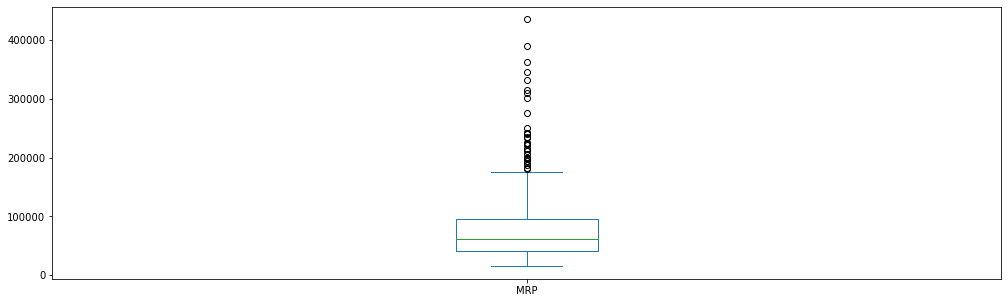

In [36]:
#Outliers
df_new['MRP'].plot(kind='box', figsize=(17,5))

<AxesSubplot:ylabel='Frequency'>

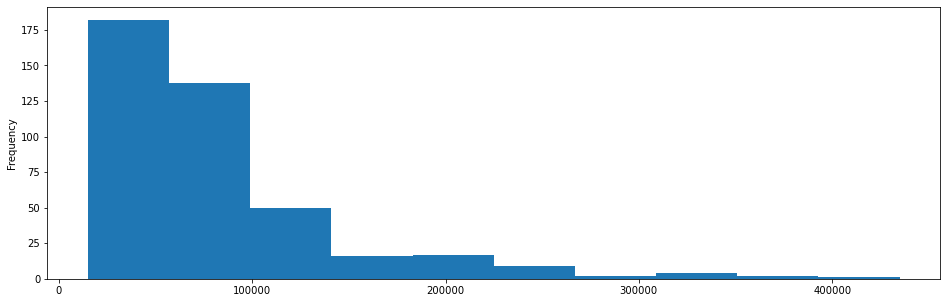

In [37]:
df_new['MRP'].plot(kind='hist', figsize=(16,5))

<AxesSubplot:xlabel='count', ylabel='RAM_Size'>

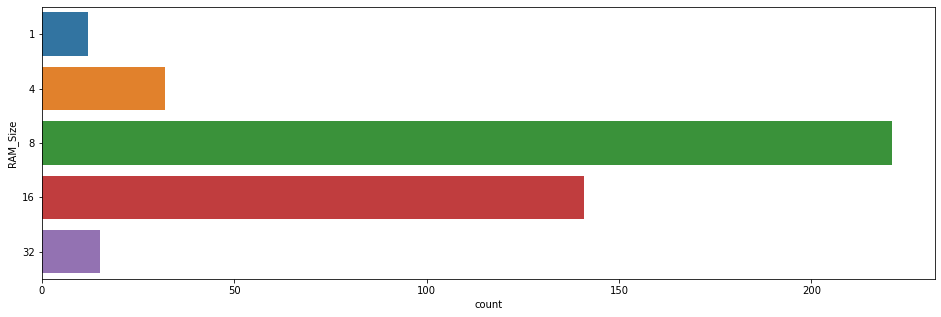

In [38]:
#RAM_size analysis
plt.figure(figsize = (16,5))
sns.countplot( y = "RAM_Size" , data = df_new)


#Obeservation : most popular one is the one with 8GB 

<AxesSubplot:xlabel='RAM_Size', ylabel='MRP'>

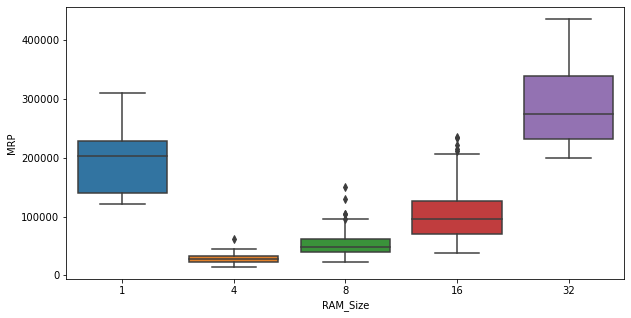

In [39]:
#Price_vs_Ram_size
plt.figure(figsize = (10,5))
sns.boxplot(x='RAM_Size', y = 'MRP', data = df_new)

#Obeservations: higher the proce for higher the RAM size , obviously

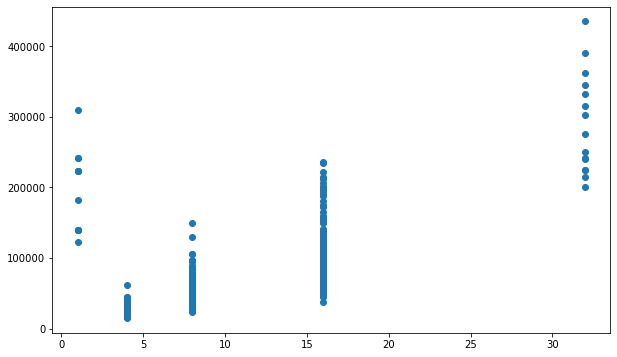

In [40]:
fig = plt.figure(figsize = (10, 6))
plt.scatter(df_new.RAM_Size, df_new.MRP)

<AxesSubplot:xlabel='Storage_size', ylabel='MRP'>

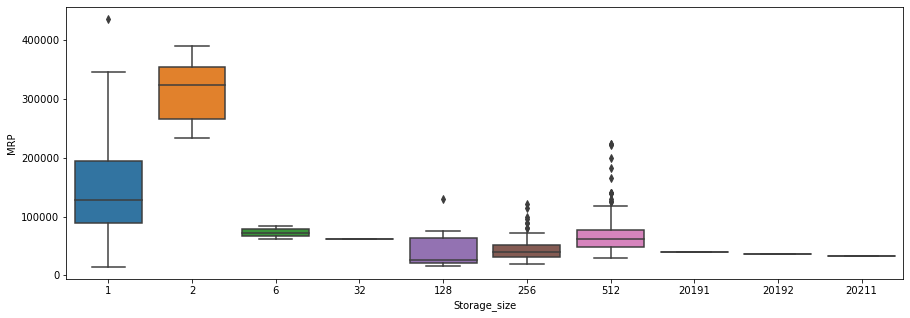

In [41]:
#Storage_size_vs_Price
plt.figure(figsize=(15, 5))
sns.boxplot(x='Storage_size', y ='MRP', data=df_new)

#OBservation: Again more the storage most the price

<AxesSubplot:>

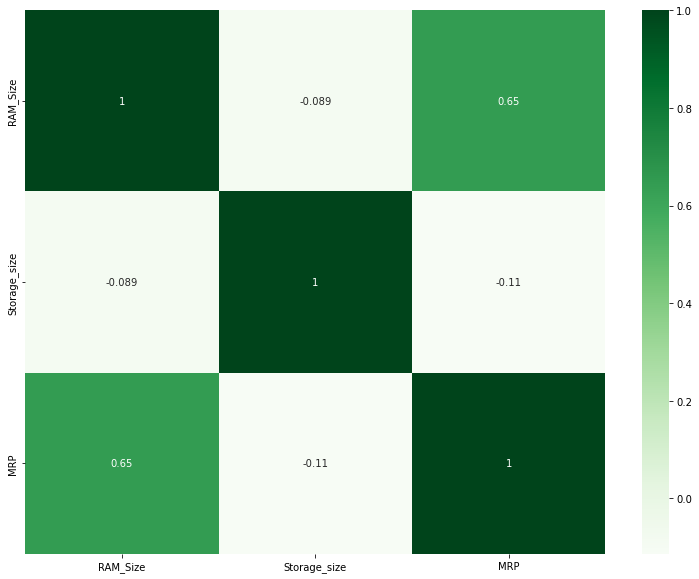

In [42]:
#Co-relation b/w Price and other numerical features 
plt.figure(figsize = (13,10))
sns.heatmap(df_new.corr(), cmap="Greens" , annot= True)

#Observation : Ram_size has most correlation b/w price 65%

Text(0.5, 1.0, 'Average Price of Laptop as per the  Brand')

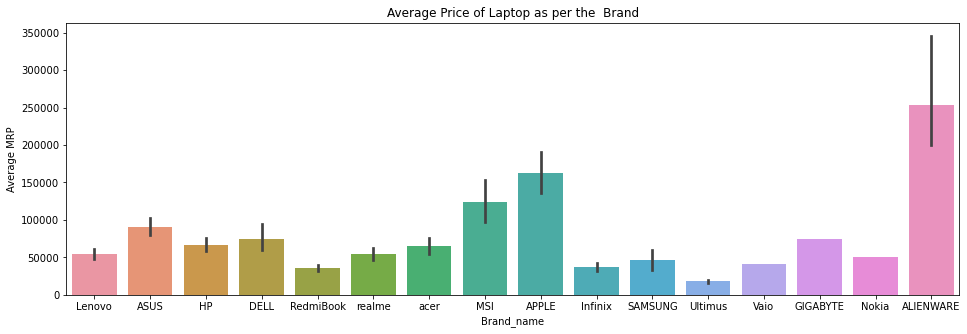

In [43]:
# Average Price as per Brand
plt.figure(figsize=(16,5))
sns.barplot(data=df, x="Brand_name", y="MRP" );
plt.ylabel("Average MRP")
plt.title("Average Price of Laptop as per the  Brand")

#Observation : "Alienware" is the most expensive one 

### Summary of insights
- ALienware is the most expensive laptops with avg of 2-3.5 lakhs
- The more the storage size the higher the price
- Higher the Ram size the higher the price
- Higher the Storage size the more expensive the laptop is . 

### Building a Model

In [44]:
df_new.drop(columns = ["Brand_name"], axis = 1)

,Processor,RAM_Size,RAM_Type,Storage_size,Storage_type,OS_Type,MRP
0,Intel,8,DDR4,256,SSD,Windows,36990.0
1,Intel,8,DDR4,512,SSD,Windows,39990.0
2,Intel,8,DDR4,512,SSD,Windows,32990.0
3,AMD,8,DDR4,512,SSD,Windows,49990.0
4,Intel,8,DDR4,512,SSD,Windows,49990.0
...,...,...,...,...,...,...,...
713,Intel,16,DDR5,512,SSD,Windows,76590.0
714,AMD,16,DDR4,512,SSD,Windows,90000.0
715,Intel,4,LPDDR4,1,SSD,Others,23490.0
718,Intel,16,LPDDR5,512,SSD,Windows,125990.0


In [45]:
df_new.head()

,Brand_name,Processor,RAM_Size,RAM_Type,Storage_size,Storage_type,OS_Type,MRP
0,Lenovo,Intel,8,DDR4,256,SSD,Windows,36990.0
1,Lenovo,Intel,8,DDR4,512,SSD,Windows,39990.0
2,ASUS,Intel,8,DDR4,512,SSD,Windows,32990.0
3,HP,AMD,8,DDR4,512,SSD,Windows,49990.0
4,ASUS,Intel,8,DDR4,512,SSD,Windows,49990.0


In [46]:
#Encoding the colums 
from sklearn.preprocessing import OrdinalEncoder

In [47]:
enc = OrdinalEncoder()

In [48]:
df_new[['Brand_name','Processor','RAM_Type','Storage_type','OS_Type']] = enc.fit_transform(df_new[['Brand_name','Processor','RAM_Type','Storage_type','OS_Type']])

C:\Users\bhask\AppData\Local\Temp\ipykernel_44624\3957059412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['Brand_name','Processor','RAM_Type','Storage_type','OS_Type']] = enc.fit_transform(df_new[['Brand_name','Processor','RAM_Type','Storage_type','OS_Type']])


In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 719
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand_name    421 non-null    float64
 1   Processor     421 non-null    float64
 2   RAM_Size      421 non-null    int64  
 3   RAM_Type      421 non-null    float64
 4   Storage_size  421 non-null    int64  
 5   Storage_type  421 non-null    float64
 6   OS_Type       421 non-null    float64
 7   MRP           421 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 29.6 KB


In [50]:
df_new.head()

,Brand_name,Processor,RAM_Size,RAM_Type,Storage_size,Storage_type,OS_Type,MRP
0,7.0,1.0,8,0.0,256,1.0,2.0,36990.0
1,7.0,1.0,8,0.0,512,1.0,2.0,39990.0
2,2.0,1.0,8,0.0,512,1.0,2.0,32990.0
3,5.0,0.0,8,0.0,512,1.0,2.0,49990.0
4,2.0,1.0,8,0.0,512,1.0,2.0,49990.0


In [51]:
# SPlitting the data into train and test
X = df_new.iloc[: , :-1]

In [52]:
X

,Brand_name,Processor,RAM_Size,RAM_Type,Storage_size,Storage_type,OS_Type
0,7.0,1.0,8,0.0,256,1.0,2.0
1,7.0,1.0,8,0.0,512,1.0,2.0
2,2.0,1.0,8,0.0,512,1.0,2.0
3,5.0,0.0,8,0.0,512,1.0,2.0
4,2.0,1.0,8,0.0,512,1.0,2.0
...,...,...,...,...,...,...,...
713,3.0,1.0,16,1.0,512,1.0,2.0
714,5.0,0.0,16,0.0,512,1.0,2.0
715,2.0,1.0,4,3.0,1,1.0,1.0
718,2.0,1.0,16,5.0,512,1.0,2.0


In [53]:
Y = df_new.iloc[ : ,-1]

In [54]:
Y

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
713     76590.0
714     90000.0
715     23490.0
718    125990.0
719     50990.0
Name: MRP, Length: 421, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( X, Y, test_size = 0.25, random_state=100 )

In [56]:
print("shape of x_train" ,x_train.shape)
print("shape of x_test" ,x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (315, 7)
shape of x_test (106, 7)
shape of y_train (315,)
shape of y_test (106,)


### Linear_Regression

In [57]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()

In [58]:
Lin_reg = Lin_reg.fit(x_train, y_train)

In [59]:
y_pred = Lin_reg.predict(x_test)

In [60]:
from sklearn.metrics import  r2_score,  mean_squared_error as mse
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [61]:
evaluation = pd.DataFrame({"Model" : ['Linear Regression'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )

In [62]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.252622e+09,35392.401097,0.386709


### K_Nearest 

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor( n_neighbors=3 )
knn = knn.fit( x_train,y_train )


In [64]:
y_pred = knn.predict(x_test)

In [65]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_knn = pd.DataFrame({"Model" : ['KNN'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_knn])

In [66]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.252622e+09,35392.401097,0.386709
0,KNN,5.436663e+08,23316.652554,0.733818


### RRandom_Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf=RandomForestRegressor(n_estimators = 10, max_depth = 12, random_state = 3)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [69]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_ran = pd.DataFrame({"Model" : ['Random_Forest'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_ran])

In [70]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.252622e+09,35392.401097,0.386709
0,KNN,5.436663e+08,23316.652554,0.733818
0,Random_Forest,4.390364e+08,20953.195137,0.785045


### Decision_Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [73]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_dec = pd.DataFrame({"Model" : ['Decision_Tree'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_dec])

In [74]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.252622e+09,35392.401097,0.386709
0,KNN,5.436663e+08,23316.652554,0.733818
0,Random_Forest,4.390364e+08,20953.195137,0.785045
0,Decision_Tree,5.984249e+08,24462.725525,0.707007


### ADA_Boost

In [75]:
from sklearn.ensemble import AdaBoostRegressor

In [76]:
ada_boost=AdaBoostRegressor(n_estimators=100,learning_rate=0.001,random_state=0)
ada_boost.fit(x_train,y_train)
y_pred=ada_boost.predict(x_test)

In [77]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_ada = pd.DataFrame({"Model" : ['ADA_Boost'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_ada])

In [78]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.252622e+09,35392.401097,0.386709
0,KNN,5.436663e+08,23316.652554,0.733818
0,Random_Forest,4.390364e+08,20953.195137,0.785045
0,Decision_Tree,5.984249e+08,24462.725525,0.707007
0,ADA_Boost,5.365907e+08,23164.426439,0.737282


### XG_Boost


In [79]:
from xgboost import XGBRegressor

In [80]:
xgb=XGBRegressor(learning_rate=0.15, n_estimators=50, max_leaves=0, random_state=98) 
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

In [81]:
MSE = mse (y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
evaluation_xg = pd.DataFrame({"Model" : ['XG_Boost'], "MSE" : [MSE], 'RMSE':[RMSE] , 'R2_Score': [R2]} )
evaluation = pd.concat([evaluation, evaluation_xg])

In [82]:
evaluation

,Model,MSE,RMSE,R2_Score
0,Linear Regression,1.252622e+09,35392.401097,0.386709
0,KNN,5.436663e+08,23316.652554,0.733818
0,Random_Forest,4.390364e+08,20953.195137,0.785045
0,Decision_Tree,5.984249e+08,24462.725525,0.707007
0,ADA_Boost,5.365907e+08,23164.426439,0.737282
0,XG_Boost,3.566053e+08,18883.995481,0.825404


### As  we can from above , XG_Boost has highest R2 score and lowest RMSE . SO , we select this model

#### Lets see if applying cross validation improves permorfance

In [83]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit

In [84]:
xgb=XGBRegressor(learning_rate=0.15, n_estimators=50, max_leaves=0, random_state=98)

k=ShuffleSplit(n_splits=20, test_size=0.2, random_state=10)
score=cross_val_score(xgb, X,Y, cv=k)

In [85]:
print("Cross validations Score:\n", score)
print("----------------------------------------------")
print("Cross validations Score Maximum :", score.max())
print("Cross validations Score Minimum:", score.min())
print("Cross validations Score Average:", score.mean())

Cross validations Score:
 [0.80722289 0.68707252 0.80706274 0.69160678 0.79020249 0.8240916
 0.66864715 0.84030239 0.83657762 0.84668153 0.78769302 0.68331002
 0.66977541 0.68328111 0.81131788 0.87775017 0.66273121 0.86496929
 0.71171316 0.82930513]
----------------------------------------------
Cross validations Score Maximum : 0.8777501712852432
Cross validations Score Minimum: 0.6627312087627302
Cross validations Score Average: 0.7690657054790686


#### But as we can see Cross validation did not improve model performance

#### Save the Model 


In [86]:
import pickle
pickle_out = open("xgb.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()